# Sieci neuronowe i deep learning - Lab 1

# KLASYFIKACJA

## Cwiczenie 1

- Pobierz zbiór danych 'olivetti_face' (możesz skorzystać z metody 'fetch_olivetti_faces': https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces)

- przejrzyj dane, sprawdź ich wymiary, jakie wartości przyjmują. Czy trzeba je normalizować?

- Zmień wymiarowość danych na 64x64 (pod inną nazwą) i wyświetl kilka z nich metodą plt.imshow()

- wygeneruj alternatyne zbiór danych z mniejszą liczbą wymiarów, korystając z algorytmu PCA: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

- Podziel oba zbióry danych na części treningową i testową, korzystając z funkcji train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html, 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Krok 1: Pobierz zbiór danych Olivetti Faces
data = fetch_olivetti_faces()
faces = data.images  # obrazy w formie 64x64
targets = data.target  # etykiety obrazów (osoby)

# Krok 2: Sprawdzenie wymiarów danych i zakresu wartości
print("Wymiary danych:", faces.shape)
print("Wymiary etykiet:", targets.shape)
print("Zakres wartości:", faces.min(), "do", faces.max())

# Dane już są znormalizowane (wartości między 0 a 1), więc nie trzeba ich dodatkowo normalizować.

# Krok 3: Wyświetlenie kilku obrazów w formacie 64x64
plt.figure(figsize=(10, 5))
for i in range(10):  # Wyświetlenie 10 przykładowych obrazów
    plt.subplot(2, 5, i + 1)
    plt.imshow(faces[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Przykładowe obrazy w formacie 64x64")
plt.show()

# Krok 4: Zmiana wymiarowości danych za pomocą PCA
# Rozwijamy dane do 2D (oryginalnie są w formacie 3D: [n_samples, 64, 64])
faces_reshaped = faces.reshape((faces.shape[0], -1))

# Definiujemy model PCA z redukcją do 100 wymiarów (np. 100 jest arbitralnym wyborem)
pca = PCA(n_components=100)
faces_pca = pca.fit_transform(faces_reshaped)

# Wyświetlenie kilku obrazów po zastosowaniu PCA i odwrotnej transformacji
# Zastosowanie odwrotnej transformacji (rekonstrukcja) do oryginalnych wymiarów
faces_reconstructed = pca.inverse_transform(faces_pca)
faces_reconstructed = faces_reconstructed.reshape((faces.shape[0], 64, 64))

# Wyświetlenie kilku przykładowych obrazów po PCA
plt.figure(figsize=(10, 5))
for i in range(10):  # Wyświetlenie 10 przykładowych obrazów po rekonstrukcji
    plt.subplot(2, 5, i + 1)
    plt.imshow(faces_reconstructed[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Przykładowe obrazy po redukcji wymiarów i rekonstrukcji PCA")
plt.show()

print("Wymiary danych po PCA:", faces_pca.shape)

# Krok 5: Podział na zbiory treningowe i testowe
# Dla oryginalnych danych (rozciągniętych do 1D) i dla danych po PCA
X_train_orig, X_test_orig, y_train, y_test = train_test_split(faces_reshaped, targets, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(faces_pca, targets, test_size=0.2, random_state=42)

print("Wymiary zbioru treningowego oryginalnego:", X_train_orig.shape)
print("Wymiary zbioru testowego oryginalnego:", X_test_orig.shape)
print("Wymiary zbioru treningowego po PCA:", X_train_pca.shape)
print("Wymiary zbioru testowego po PCA:", X_test_pca.shape)

ModuleNotFoundError: No module named 'matplotlib'

## Ćwiczenie 2

 - Utwórz sieć neuronową dla każdego z dwóch zbiorów danych korzystając z obiektów MLPCLassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. 
 - Wytrenuj swoje sieci na zbiorach treningowych
 - Zmierz dokładności i f1-scores (micro oraz macro) dla swoich sieci, zarówno dla zbiorów testowych jak i teningowych: (https://scikit-learn.org/stable/modules/model_evaluation.html)
 - Wyrysuj krzywe uczenia sieci neuronowych
 - Spróbój powtórzyć kilka razy wywołanie kodu zmieniając ręcznie architekturę sieci i inne hiperparametry. Zapamiętaj najlepsze ustawieniefrom sklearn.metrics import accuracy_score, f1score

C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Oryginalne dane:
Dokładność (trening): 0.98125
Dokładność (test): 0.85
F1-score micro (trening): 0.98125
F1-score micro (test): 0.85
F1-score macro (trening): 0.9799456574127628
F1-score macro (test): 0.7992804492804492

Dane po PCA:
Dokładność (trening): 1.0
Dokładność (test): 0.975
F1-score micro (trening): 1.0
F1-score micro (test): 0.975
F1-score macro (trening): 1.0
F1-score macro (test): 0.9839826839826838


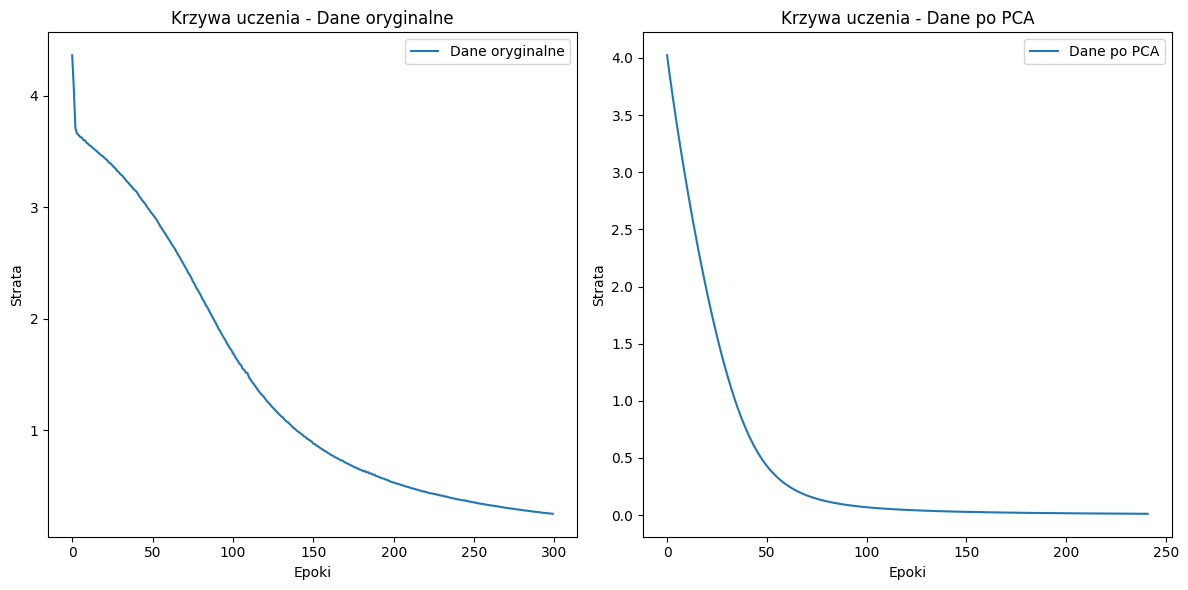

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# Krok 3: Definiowanie i trenowanie sieci neuronowych
# Dla danych oryginalnych
mlp_orig = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_orig.fit(X_train_orig, y_train)

# Dla danych po PCA
mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Krok 4: Ocena modelu - dokładność i F1-score
# Dla danych oryginalnych
y_train_pred_orig = mlp_orig.predict(X_train_orig)
y_test_pred_orig = mlp_orig.predict(X_test_orig)
accuracy_train_orig = accuracy_score(y_train, y_train_pred_orig)
accuracy_test_orig = accuracy_score(y_test, y_test_pred_orig)
f1_train_orig_micro = f1_score(y_train, y_train_pred_orig, average='micro')
f1_test_orig_micro = f1_score(y_test, y_test_pred_orig, average='micro')
f1_train_orig_macro = f1_score(y_train, y_train_pred_orig, average='macro')
f1_test_orig_macro = f1_score(y_test, y_test_pred_orig, average='macro')

# Dla danych po PCA
y_train_pred_pca = mlp_pca.predict(X_train_pca)
y_test_pred_pca = mlp_pca.predict(X_test_pca)
accuracy_train_pca = accuracy_score(y_train, y_train_pred_pca)
accuracy_test_pca = accuracy_score(y_test, y_test_pred_pca)
f1_train_pca_micro = f1_score(y_train, y_train_pred_pca, average='micro')
f1_test_pca_micro = f1_score(y_test, y_test_pred_pca, average='micro')
f1_train_pca_macro = f1_score(y_train, y_train_pred_pca, average='macro')
f1_test_pca_macro = f1_score(y_test, y_test_pred_pca, average='macro')

# Wyświetlanie wyników
print("Oryginalne dane:")
print("Dokładność (trening):", accuracy_train_orig)
print("Dokładność (test):", accuracy_test_orig)
print("F1-score micro (trening):", f1_train_orig_micro)
print("F1-score micro (test):", f1_test_orig_micro)
print("F1-score macro (trening):", f1_train_orig_macro)
print("F1-score macro (test):", f1_test_orig_macro)

print("\nDane po PCA:")
print("Dokładność (trening):", accuracy_train_pca)
print("Dokładność (test):", accuracy_test_pca)
print("F1-score micro (trening):", f1_train_pca_micro)
print("F1-score micro (test):", f1_test_pca_micro)
print("F1-score macro (trening):", f1_train_pca_macro)
print("F1-score macro (test):", f1_test_pca_macro)

# Krok 5: Rysowanie krzywych uczenia
plt.figure(figsize=(12, 6))

# Krzywa uczenia dla danych oryginalnych
plt.subplot(1, 2, 1)
plt.plot(mlp_orig.loss_curve_, label="Dane oryginalne")
plt.title("Krzywa uczenia - Dane oryginalne")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()

# Krzywa uczenia dla danych po PCA
plt.subplot(1, 2, 2)
plt.plot(mlp_pca.loss_curve_, label="Dane po PCA")
plt.title("Krzywa uczenia - Dane po PCA")
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()

plt.tight_layout()
plt.show()


## Ćwiczenie 3

- Spróbuj zoptymalizować hiperparametry sieci używając obiektów GridSearchCV lub RandomizedSearchCV (https://scikit-learn.org/stable/modules/grid_search.html). Uważaj, aby nie przesadzić z liczbą sprawdzanych konfiguracji ze względu na czas uczenia
 
 - Wyświetl wartości accuracy, f1-score (micro i macro) oraz macierz pomyłek dla najlepsych sieci (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
 
 - Przeprowadź uczenie z kroswalidację swoich najlepszych modeli (cross_val_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
 

C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Najlepsze parametry dla danych oryginalnych: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Najlepsze parametry dla danych po PCA: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}

Wyniki dla modelu: Dane oryginalne
Dokładność (trening): 0.996875
Dokładność (test): 0.9125
F1-score micro (trening): 0.996875
F1-score micro (test): 0.9125
F1-score macro (trening): 0.996606334841629
F1-score macro (test): 0.9105105105105104

Wyniki dla modelu: Dane po PCA
Dokładność (trening): 1.0
Dokładność (test): 0.9625
F1-score micro (trening): 1.0
F1-score micro (test): 0.9625
F1-score macro (trening): 1.0
F1-score macro (test): 0.9773027898027897


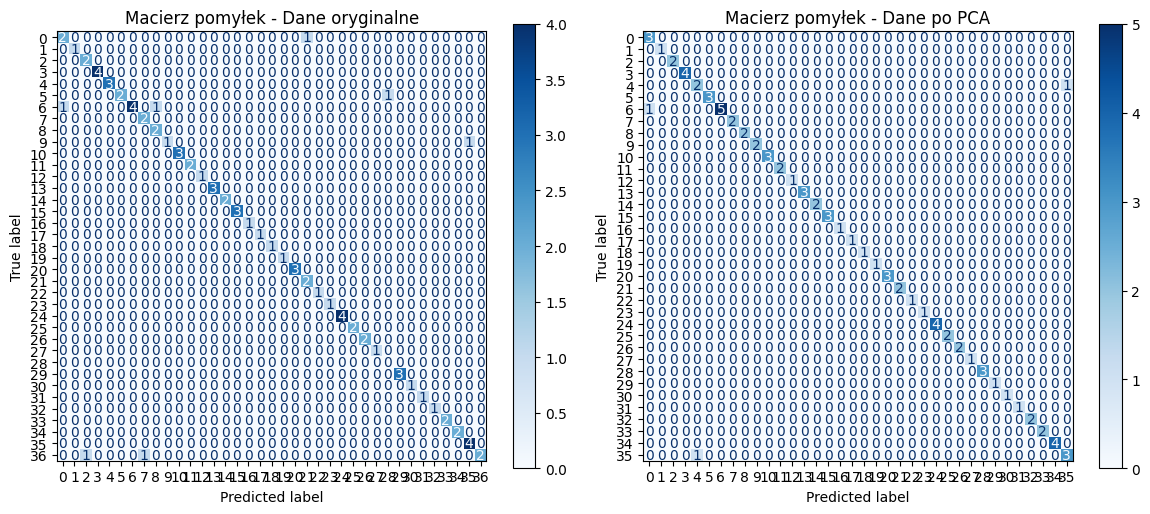

C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GIGABYTE\AppD


Wyniki kroswalidacji (F1 micro) dla najlepszego modelu - Dane oryginalne: [0.875    0.921875 0.90625  0.953125 0.9375  ]
Średnia F1 micro - Dane oryginalne: 0.91875

Wyniki kroswalidacji (F1 micro) dla najlepszego modelu - Dane po PCA: [0.9375   0.953125 0.921875 0.921875 0.953125]
Średnia F1 micro - Dane po PCA: 0.9375


C:\Users\GIGABYTE\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Definiowanie parametrów do optymalizacji
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Grid Search dla danych oryginalnych
grid_search_orig = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid, cv=3, scoring='f1_micro')
grid_search_orig.fit(X_train_orig, y_train)

# Grid Search dla danych po PCA
grid_search_pca = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid, cv=3, scoring='f1_micro')
grid_search_pca.fit(X_train_pca, y_train)

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry dla danych oryginalnych:", grid_search_orig.best_params_)
print("Najlepsze parametry dla danych po PCA:", grid_search_pca.best_params_)

# Predykcje z najlepszymi modelami
best_model_orig = grid_search_orig.best_estimator_
best_model_pca = grid_search_pca.best_estimator_

y_train_pred_orig = best_model_orig.predict(X_train_orig)
y_test_pred_orig = best_model_orig.predict(X_test_orig)
y_train_pred_pca = best_model_pca.predict(X_train_pca)
y_test_pred_pca = best_model_pca.predict(X_test_pca)

# Obliczanie dokładności i F1-score
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train_micro = f1_score(y_train, y_train_pred, average='micro')
    f1_test_micro = f1_score(y_test, y_test_pred, average='micro')
    f1_train_macro = f1_score(y_train, y_train_pred, average='macro')
    f1_test_macro = f1_score(y_test, y_test_pred, average='macro')

    print(f"\nWyniki dla modelu: {model_name}")
    print("Dokładność (trening):", accuracy_train)
    print("Dokładność (test):", accuracy_test)
    print("F1-score micro (trening):", f1_train_micro)
    print("F1-score micro (test):", f1_test_micro)
    print("F1-score macro (trening):", f1_train_macro)
    print("F1-score macro (test):", f1_test_macro)

evaluate_model(y_train, y_train_pred_orig, y_test, y_test_pred_orig, "Dane oryginalne")
evaluate_model(y_train, y_train_pred_pca, y_test, y_test_pred_pca, "Dane po PCA")

# Rysowanie macierzy pomyłek
plt.figure(figsize=(12, 5))

# Macierz pomyłek dla danych oryginalnych
plt.subplot(1, 2, 1)
conf_matrix_orig = confusion_matrix(y_test, y_test_pred_orig)
ConfusionMatrixDisplay(conf_matrix_orig).plot(cmap='Blues', ax=plt.gca())
plt.title("Macierz pomyłek - Dane oryginalne")

# Macierz pomyłek dla danych po PCA
plt.subplot(1, 2, 2)
conf_matrix_pca = confusion_matrix(y_test, y_test_pred_pca)
ConfusionMatrixDisplay(conf_matrix_pca).plot(cmap='Blues', ax=plt.gca())
plt.title("Macierz pomyłek - Dane po PCA")

plt.tight_layout()
plt.show()

# Kroswalidacja najlepszych modeli
cross_val_orig = cross_val_score(best_model_orig, X_train_orig, y_train, cv=5, scoring='f1_micro')
cross_val_pca = cross_val_score(best_model_pca, X_train_pca, y_train, cv=5, scoring='f1_micro')

print("\nWyniki kroswalidacji (F1 micro) dla najlepszego modelu - Dane oryginalne:", cross_val_orig)
print("Średnia F1 micro - Dane oryginalne:", cross_val_orig.mean())
print("\nWyniki kroswalidacji (F1 micro) dla najlepszego modelu - Dane po PCA:", cross_val_pca)
print("Średnia F1 micro - Dane po PCA:", cross_val_pca.mean())

# REGRESJA

## Ćwiczenie 4

 - Użyj pniższego generatora do wygenerowania funkcji 1D dla problemu regresji (możes zmienić funkcję bazową wedle uznania). 
 - Narysuj dane i funkcję bazową.

In [11]:
def fun(x):
    return np.sin(x)+np.exp(np.cos(4*x))

def generator(N, minx=0, maxx=4):
    noise = np.random.normal(0, 0.1, N)
    x = (maxx-minx)*np.random.random(N)+minx
    y = fun(x)+noise
    return x, y


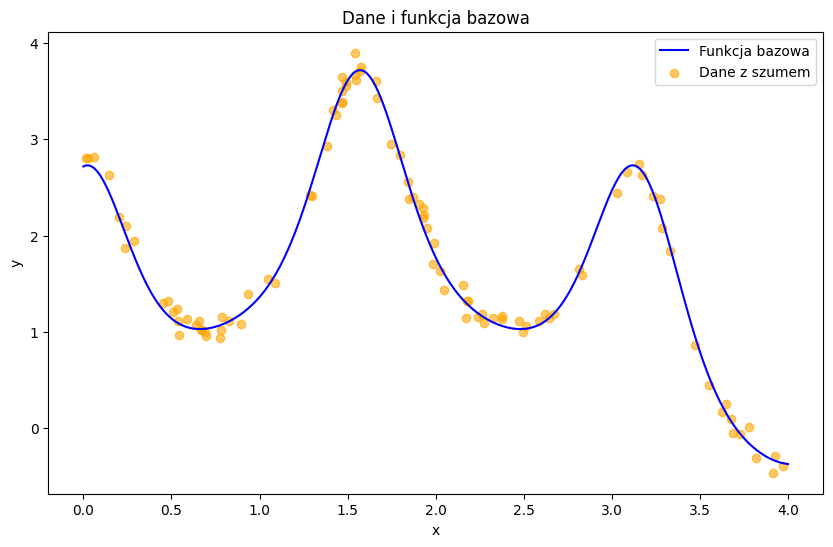

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji bazowej
def fun(x):
    return np.sin(x) + np.exp(np.cos(4 * x))

# Definicja generatora danych
def generator(N, minx=0, maxx=4):
    noise = np.random.normal(0, 0.1, N)
    x = (maxx - minx) * np.random.random(N) + minx
    y = fun(x) + noise
    return x, y

# Generowanie danych
N = 100
x, y = generator(N)

# Rysowanie danych i funkcji bazowej
x_plot = np.linspace(0, 4, 500)
y_plot = fun(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label="Funkcja bazowa", color="blue")
plt.scatter(x, y, color="orange", alpha=0.6, label="Dane z szumem")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dane i funkcja bazowa")
plt.legend()
plt.show()


## Ćwiczenie 5

 - Utwórz obiekt MLPRegressor o sensownej architekturze i sensownych hiperparametrach (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). 
 - Wytrenuj na wygenerowanych danych. 
 - PRzetestuj na danych "xgrid" podanych poniżej i wyznacz błąd. 
 - Narysuj dane, funkcję bazową i dopasowaną funkcję na jednym wykresie
 - Potestuj różne inne architektury sieci

Średni błąd kwadratowy (MSE) na danych testowych: 0.3726411599091773


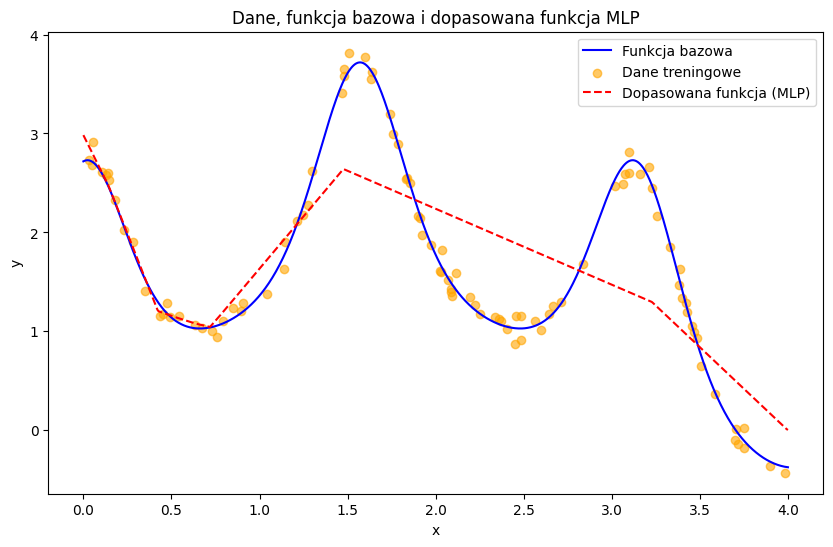

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Definicja funkcji bazowej
def fun(x):
    return np.sin(x) + np.exp(np.cos(4 * x))

# Generator danych z szumem
def generator(N, minx=0, maxx=4):
    noise = np.random.normal(0, 0.1, N)
    x = (maxx - minx) * np.random.random(N) + minx
    y = fun(x) + noise
    return x, y

# Generowanie danych treningowych
N = 100
x_train, y_train = generator(N)

# Konfiguracja sieci neuronowej dla regresji
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', 
                   alpha=0.001, max_iter=1000, random_state=42)

# Trenowanie modelu
mlp.fit(x_train.reshape(-1, 1), y_train)

# Testowanie modelu na xgrid
xgrid = np.linspace(0, 4, 1000)
ygrid = fun(xgrid)
y_pred = mlp.predict(xgrid.reshape(-1, 1))

# Obliczenie błędu
mse = mean_squared_error(ygrid, y_pred)
print("Średni błąd kwadratowy (MSE) na danych testowych:", mse)

# Rysowanie wyników
plt.figure(figsize=(10, 6))
plt.plot(xgrid, ygrid, label="Funkcja bazowa", color="blue")
plt.scatter(x_train, y_train, color="orange", alpha=0.6, label="Dane treningowe")
plt.plot(xgrid, y_pred, label="Dopasowana funkcja (MLP)", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dane, funkcja bazowa i dopasowana funkcja MLP")
plt.legend()
plt.show()
